### Análise Exploratória - Conjunto de Dados de "Heart Failure"

Nesse notebook iremos explorar um pouco o conjunto de dados que escolhemos trabalhar, dado que queremos aplicar uma solução de classificação, isto é, um modelo supervisionado, vamos explorar o conjunto e tentar identificar quais variáveis podem contribuir para predizermos com uma precisão aceitável a probabilidade de insuficiência cardíaca. 

A ideia com esse modelo é utilizarmos sua imagem pós construção para criarmos uma aplicação que ficara chamando o modelo a cada 30 segundos e medirá por um tempo suas probabilidades, e qual a finalidade com isso?
Queremos utilizar posteriormente para visualizarmos a série temporal dessas probabilidades e, dessa forma, iremos monitorar com ainda mais precisão a sáude de um indivíduo de acordo com as suas características físicas, a fim de prevenirmos um possível acidente.

In [1]:
# Importando Libs:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [20]:
# Importando Dataset:
df_heart = pd.read_csv(r"C:\Users\lucaa\Desktop\Pastas Gerais\Pós Tech Data Analytics\Tech Challenge\TechChallenge - Fase 3\techc_fase3_ml\data\raw\dataset_heart.csv", sep = ",")

In [3]:
print("Total de tuplas:", df_heart.shape)
df_heart.head()

Total de tuplas: (299, 13)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df_heart.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [5]:
df_heart.columns = ['idade', 'anemia', 'creatina_fosfoquinase', 'diabetes',
 'fracao_de_ejecao', 'hipertensao_arterial', 'plaquetas',
 'creatinina_serica', 'sodio_serico', 'sexo', 'tabagismo', 'tempo',
 'evento_de_obito']

In [6]:
df_heart.dtypes

idade                    float64
anemia                     int64
creatina_fosfoquinase      int64
diabetes                   int64
fracao_de_ejecao           int64
hipertensao_arterial       int64
plaquetas                float64
creatinina_serica        float64
sodio_serico               int64
sexo                       int64
tabagismo                  int64
tempo                      int64
evento_de_obito            int64
dtype: object

O interessante é que todas as variáveis estão "de alguma forma" populadas, porém precisamos ver se não tem nenhum problema de inflacionamento de zeros por exemplo, que pode ser algo que deve ser tratado, caso contrário pode afetar nosso modelo.

### Visualizações

Vamos iniciar com algumas visualizações para podermos verificar quais variações podem ser interessantes dentro do modelo.

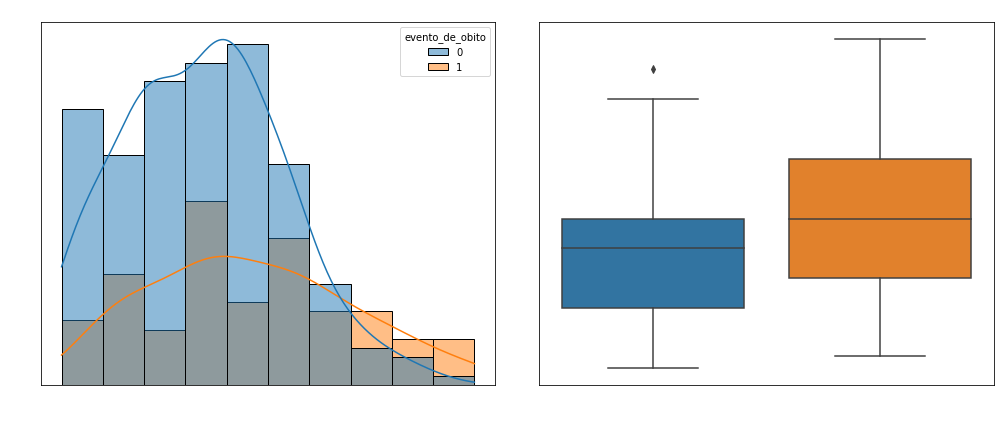

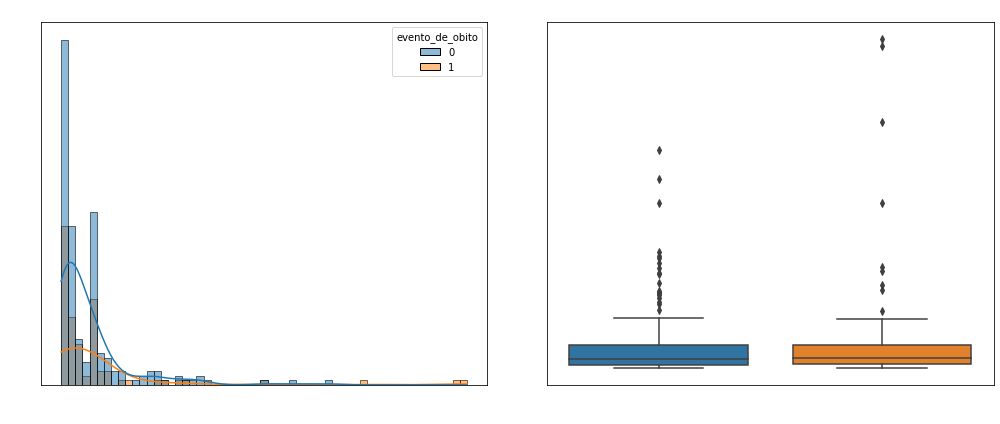

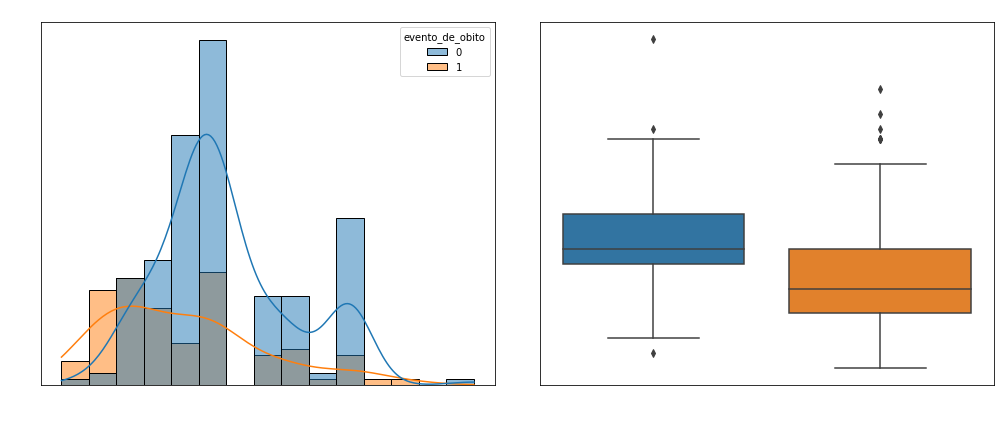

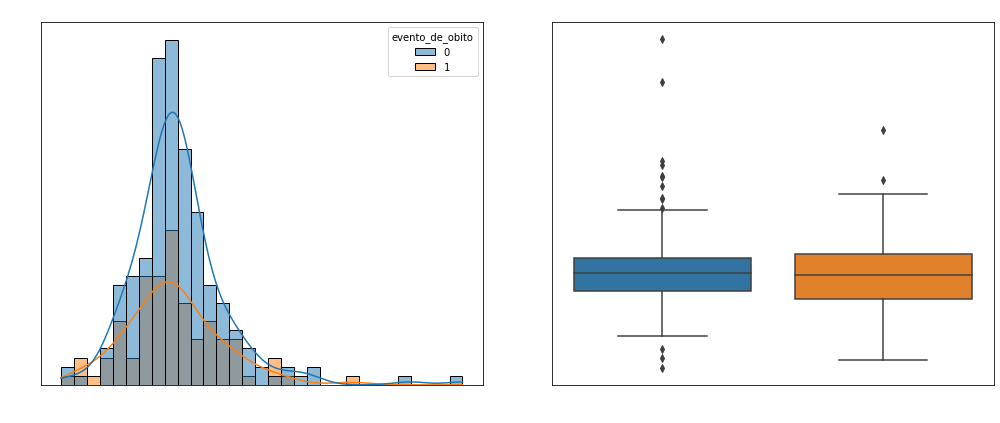

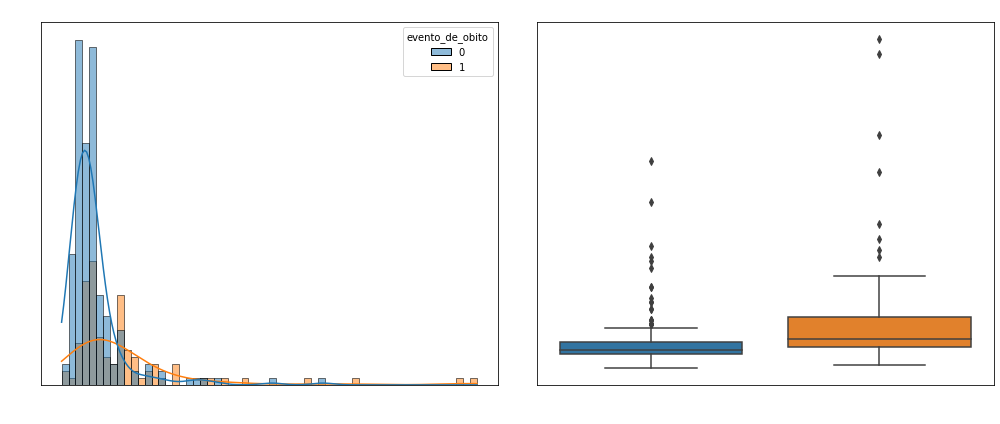

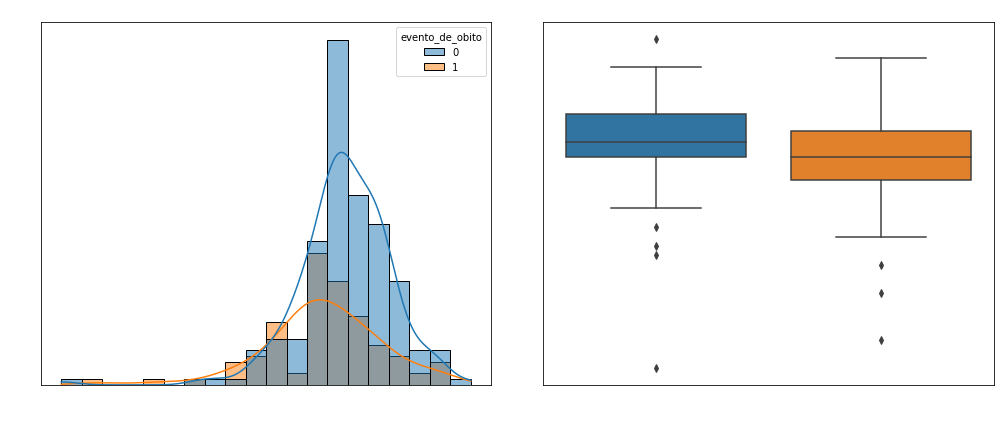

In [7]:
# Distribuição de variáveis contínuas
# Vamos plotar Histogramas e Boxplots
continous_vars = ['idade', 'creatina_fosfoquinase', 'fracao_de_ejecao', 'plaquetas', 'creatinina_serica', 'sodio_serico']
for var in continous_vars:
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))  # 1 linha, 2 colunas
    
    # Histograma com KDE
    sns.histplot(data=df_heart, x=var, hue='evento_de_obito', kde=True, ax=ax[0])
    ax[0].set_title(f'Histograma de {var}', color = "white")
    
    # Boxplot
    sns.boxplot(data=df_heart, x='evento_de_obito', y=var, ax=ax[1])
    ax[1].set_title(f'Boxplot de {var}', color = "white")

    # Ajustar layout
    plt.tight_layout()
    for i in [0, 1]:
        ax[i].set_ylabel(ylabel = "Valor", color = "white")
        ax[i].set_xlabel(xlabel = var, color = "white")
    for axis in ax:
        axis.tick_params(colors='white')  # Cor das marcas (ticks)
    plt.show()

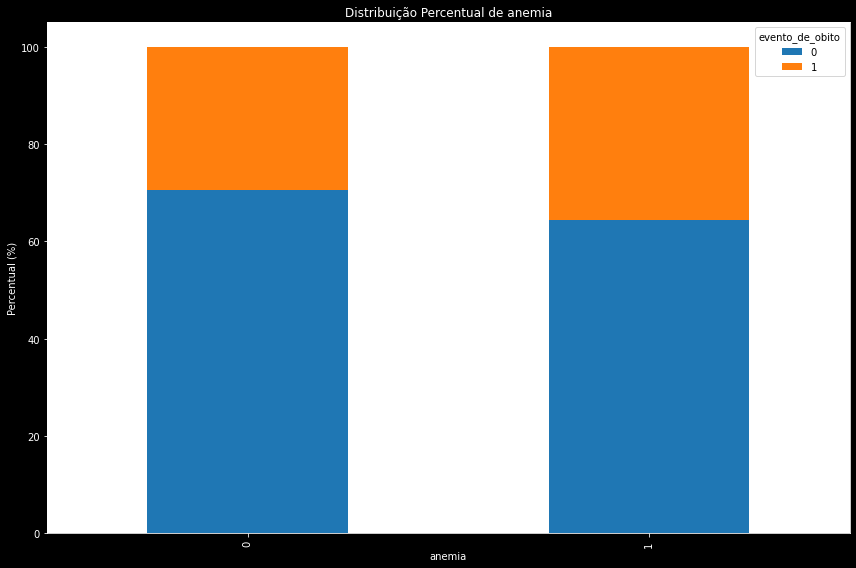

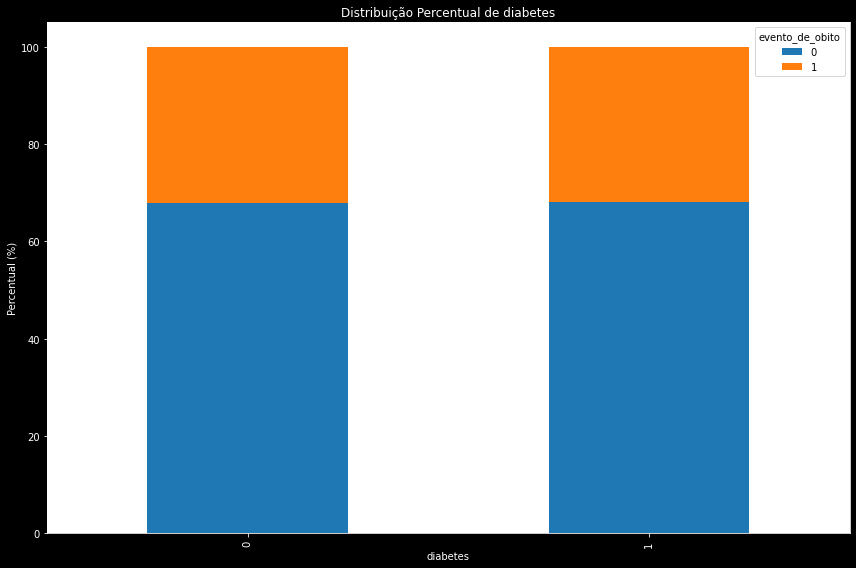

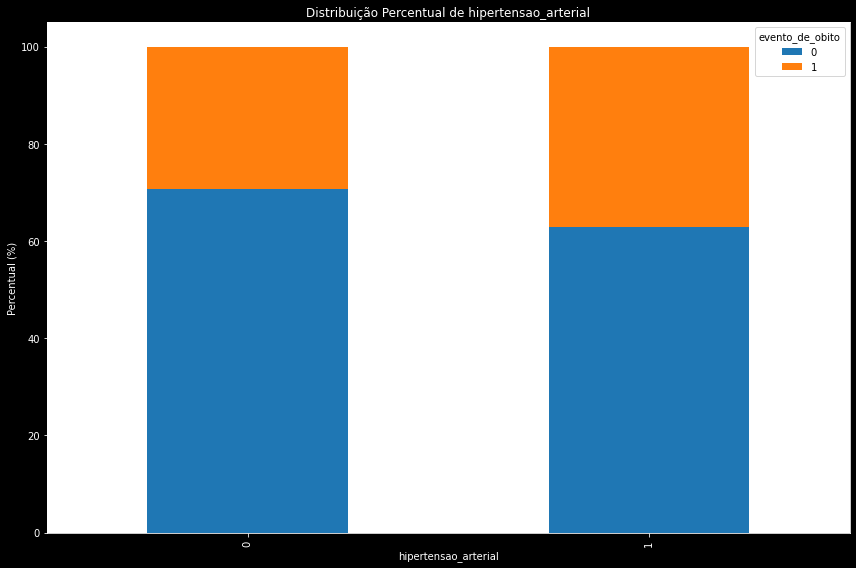

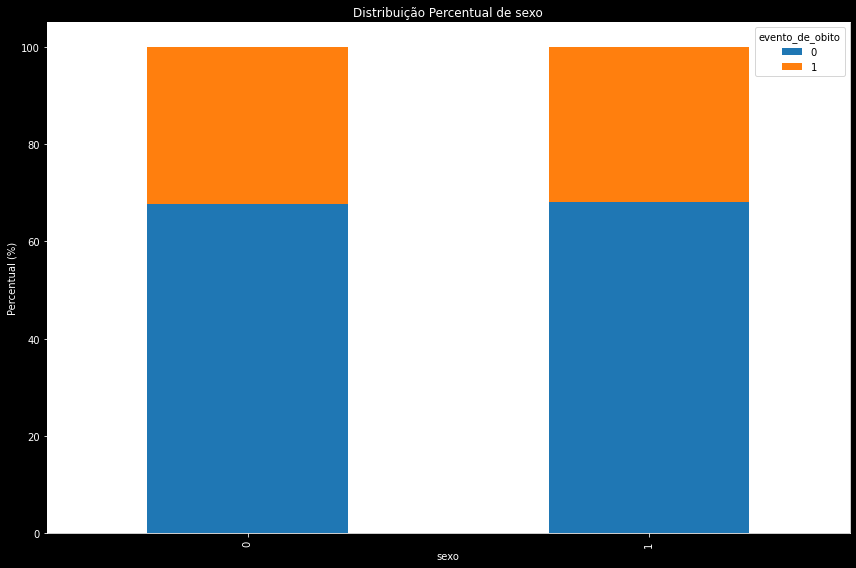

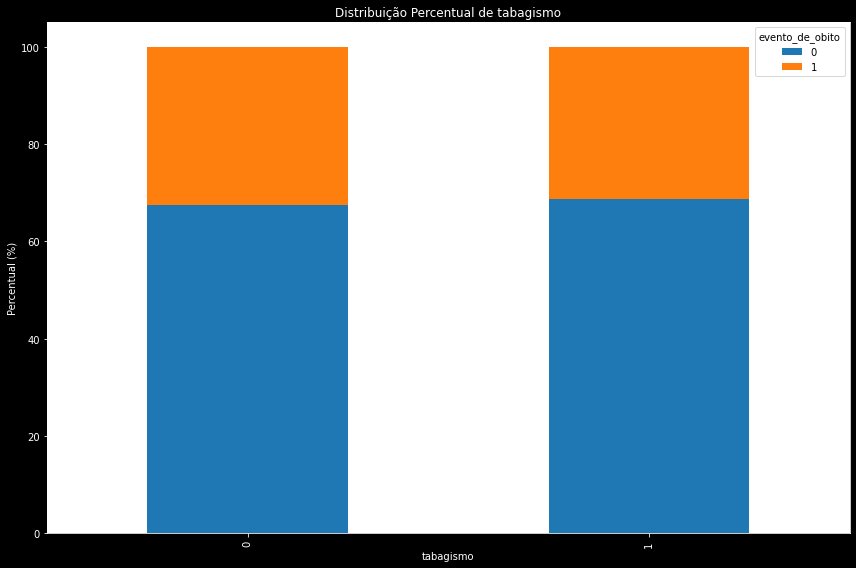

In [8]:
# Distribuição de variáveis categóricas
categorical_vars = ['anemia', 'diabetes', 'hipertensao_arterial', 'sexo', 'tabagismo']
for var in categorical_vars:
    # Criar tabela de frequência para contar as proporções
    counts = df_heart.groupby(['evento_de_obito', var]).size().unstack().T
    percentages = counts.div(counts.sum(axis=1), axis=0) * 100  # Calcular porcentagens
    
    # Criar figura
    fig, ax = plt.subplots(figsize=(12, 8), facecolor='black')
    
    # Plotar gráfico de barras empilhadas
    percentages.plot(kind='bar', stacked=True, ax=ax)  # Exemplo de cores
    
    # Título e labels em branco
    ax.set_title(f'Distribuição Percentual de {var}', color='white')
    ax.set_xlabel(var, color='white')
    ax.set_ylabel('Percentual (%)', color='white')
    
    # Ajustar cor dos ticks e bordas
    ax.tick_params(colors='white')  # Cor dos ticks
    ax.spines['top'].set_color('white')
    ax.spines['bottom'].set_color('white')
    ax.spines['left'].set_color('white')
    ax.spines['right'].set_color('white')
    
    # Alterar cor da legenda
    legend = ax.get_legend()
    
    # Ajustar layout
    plt.tight_layout()
    plt.show()

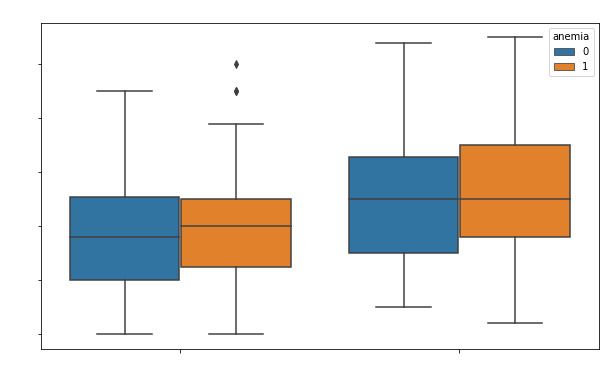

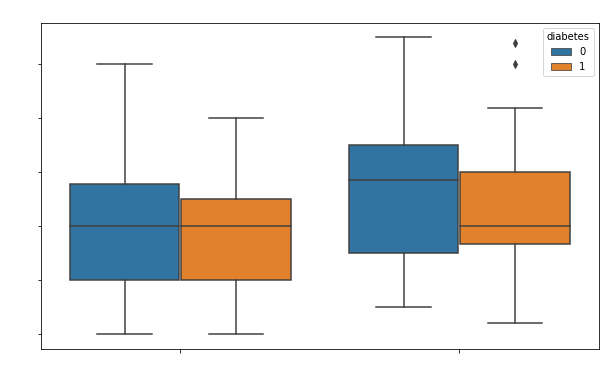

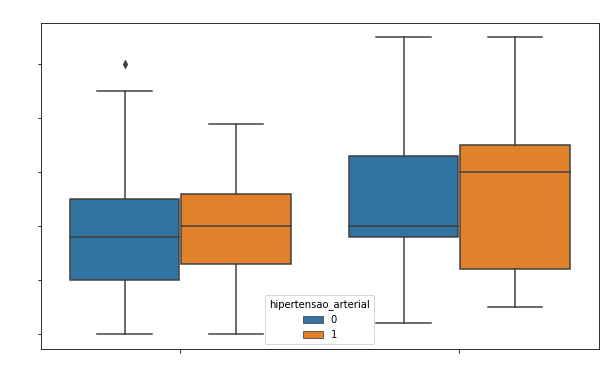

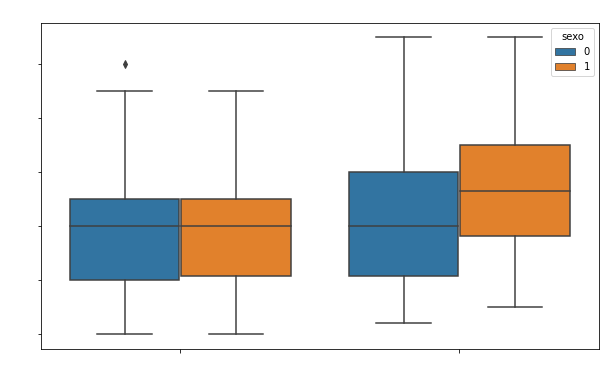

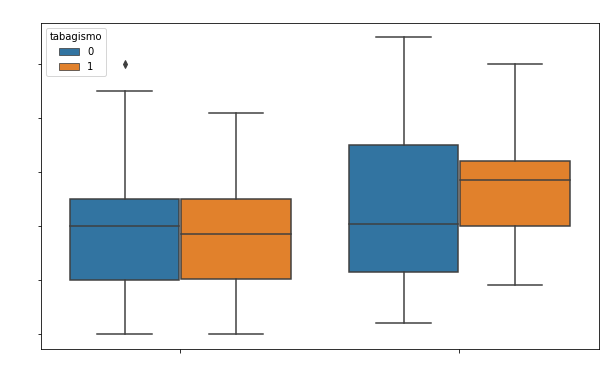

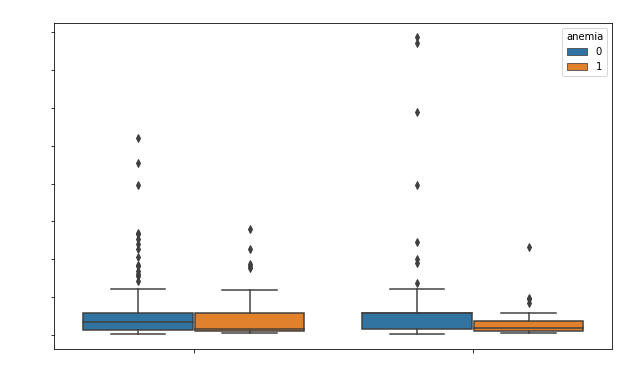

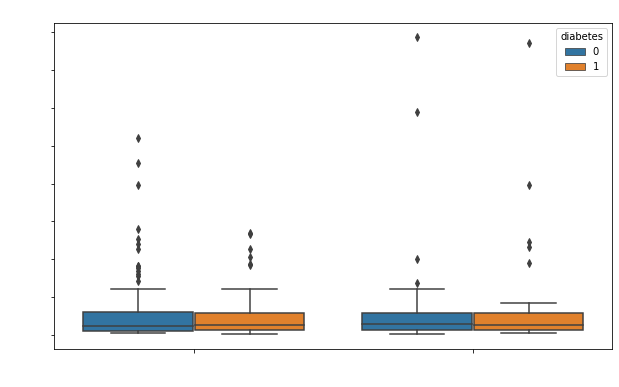

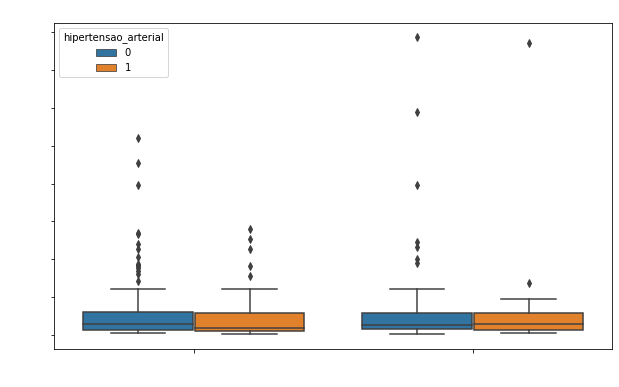

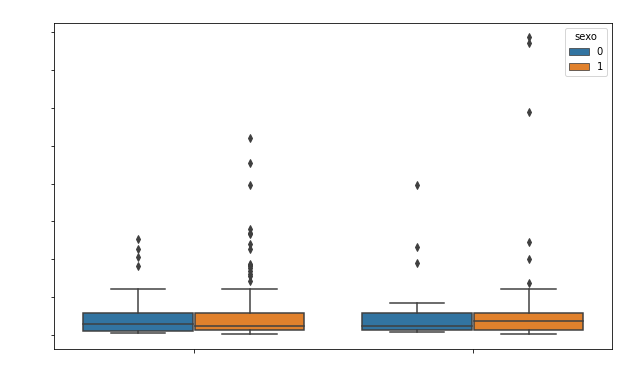

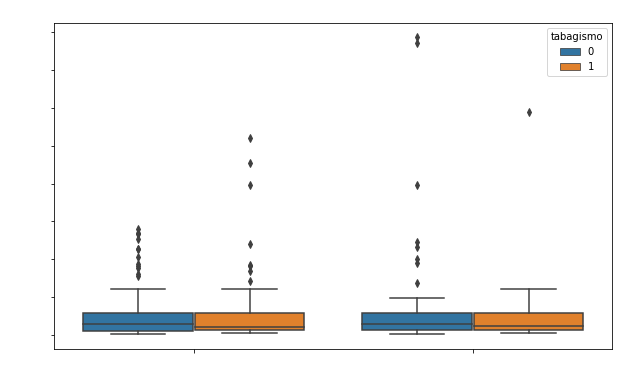

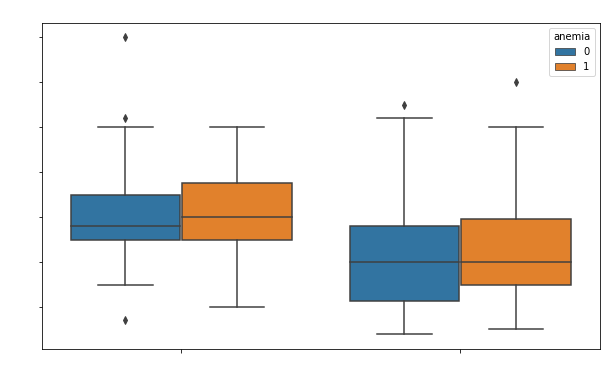

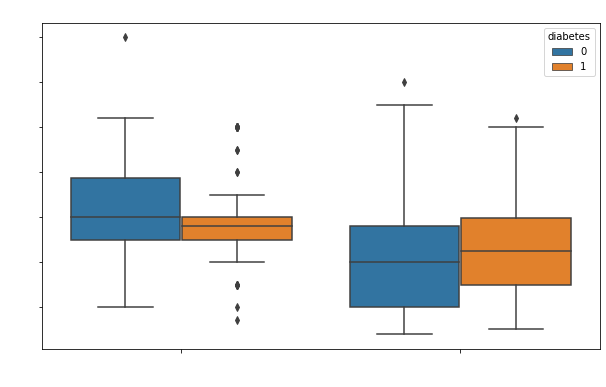

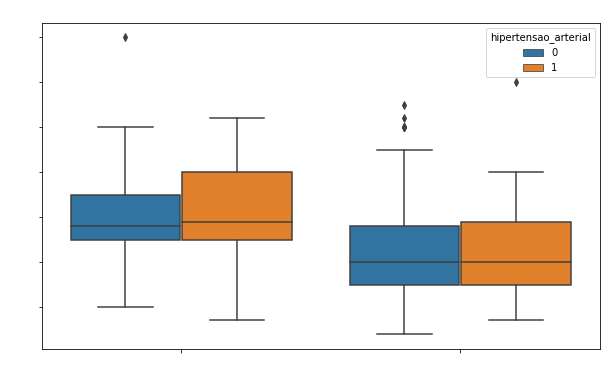

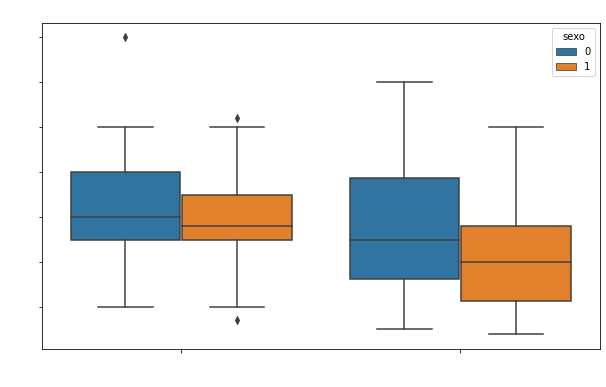

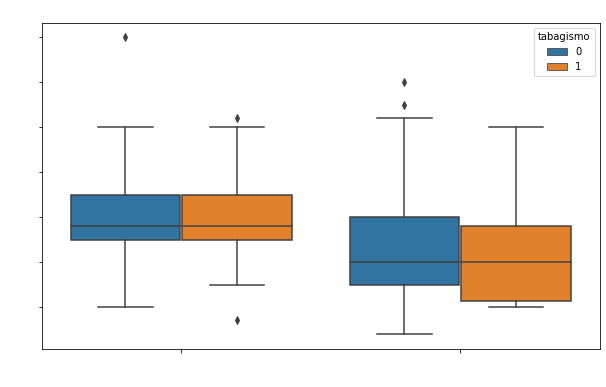

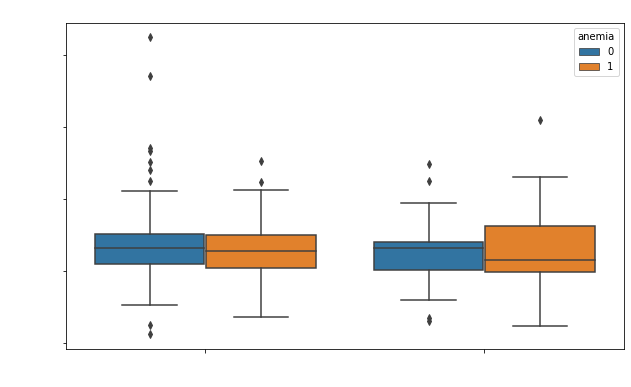

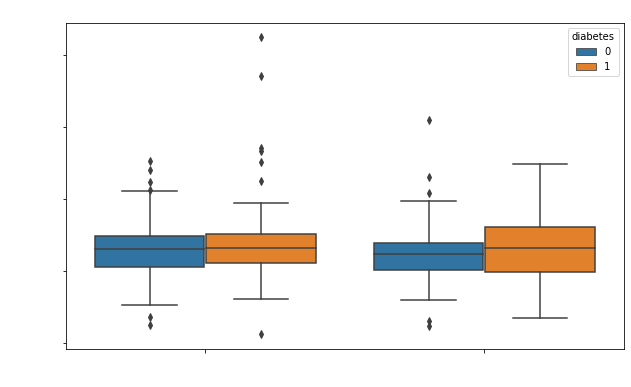

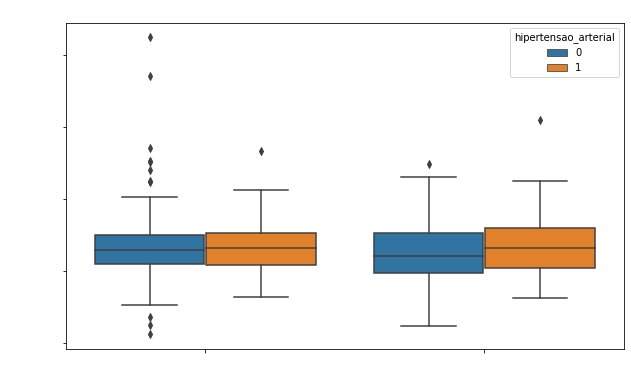

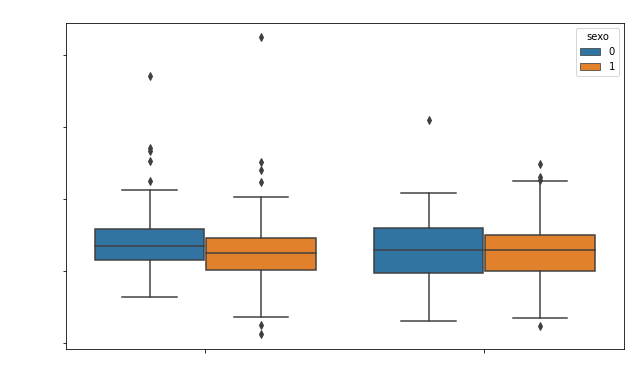

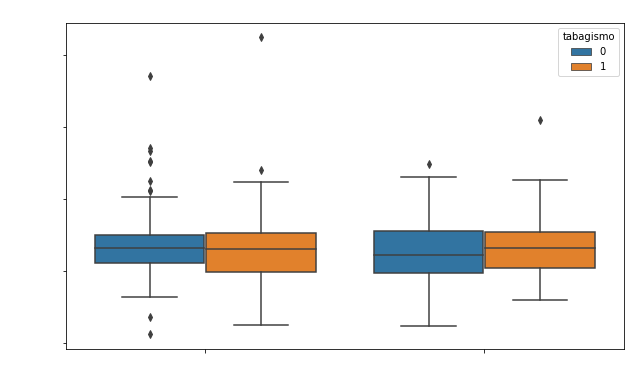

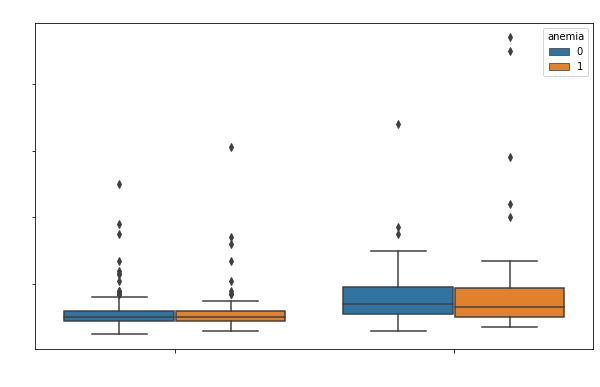

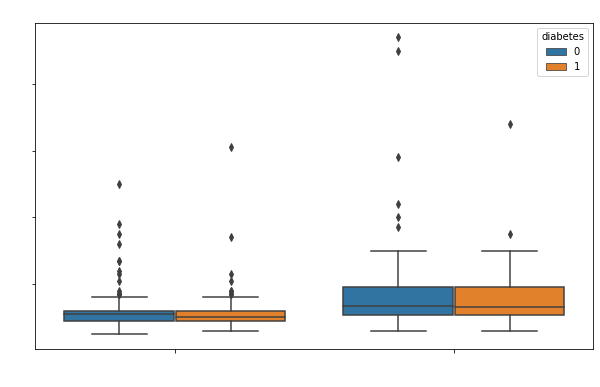

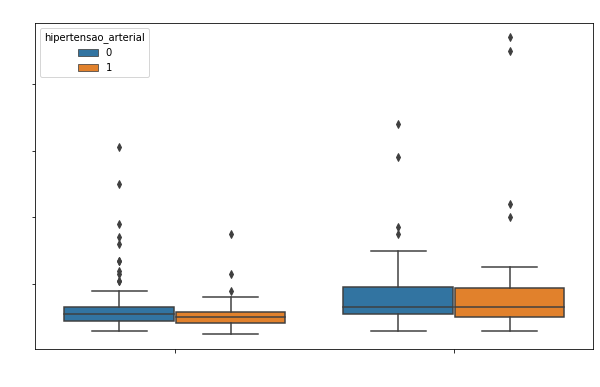

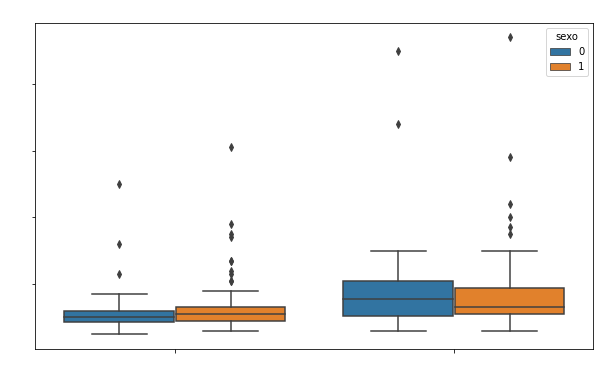

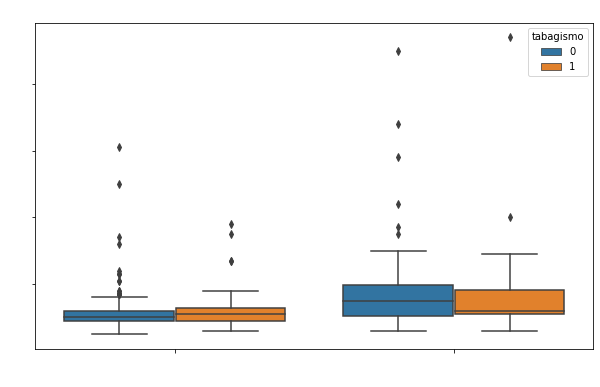

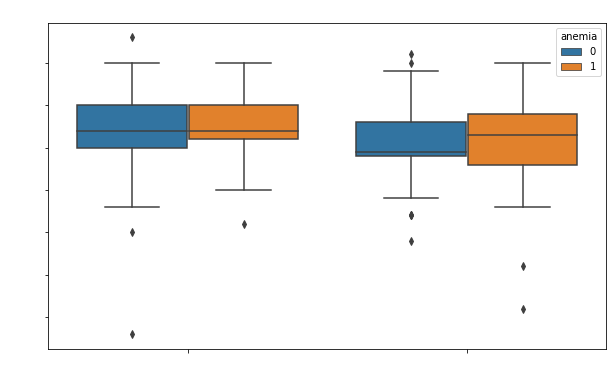

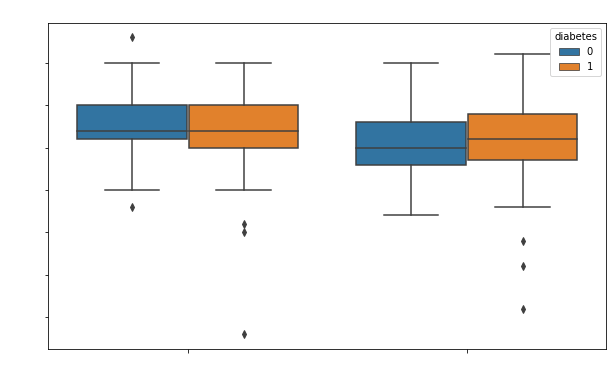

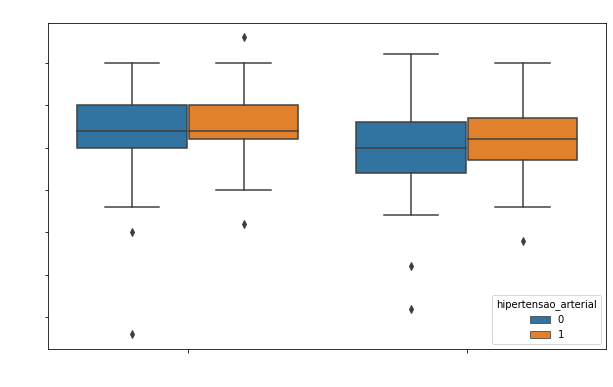

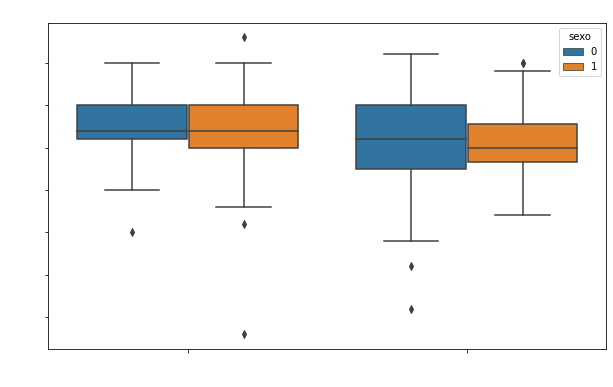

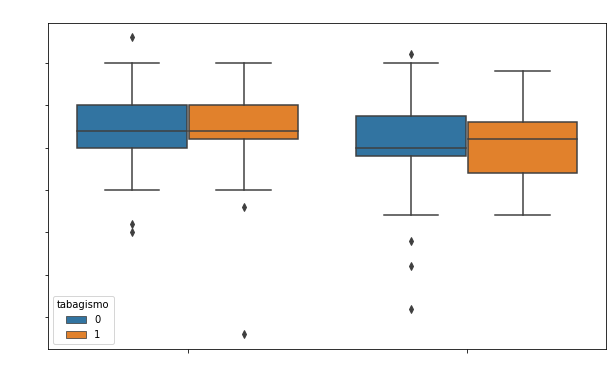

In [19]:
# Distribuição de variáveis contínuas
# Vamos plotar Histogramas e Boxplots
for con_var in continous_vars:
    for cat_var in categorical_vars: 
        # Boxplot
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=df_heart, x='evento_de_obito', y=con_var, hue=cat_var)
        plt.title(f'Boxplot de {con_var} x {cat_var}', color = "white")
        plt.xlabel('Evento Óbito', color='white')
        plt.ylabel(con_var, color='white')
        plt.yticks(color = "white")
        plt.xticks(color = "white")
        plt.show()

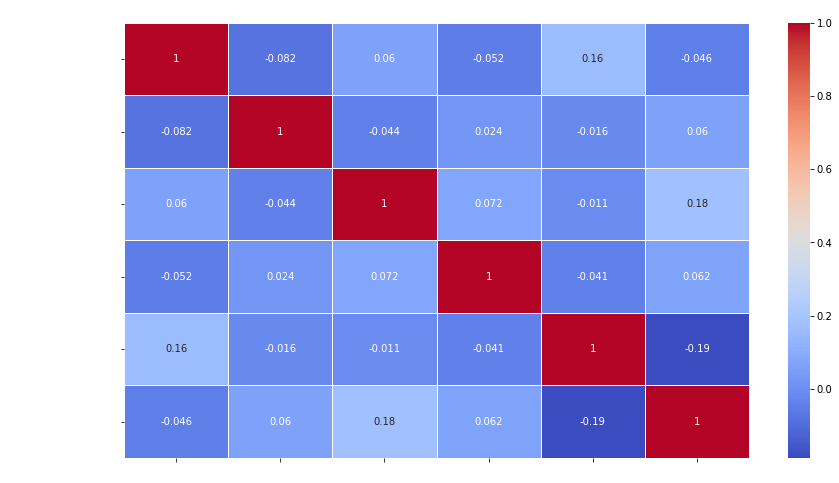

In [10]:
# Matriz de correlação
correlation_matrix = df_heart[continous_vars].corr()
plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.yticks(color = "white")
plt.xticks(color = "white")
plt.title('Matriz de Correlação', color = "white")
plt.show()

O interessante é que não temos uma correlação alta entre as variáveis númericas, dessa forma não precisamos nos preocupar tanto com uma possível multicolinearidade e podemos simplesmente colocar todas as variáveis no treinamento de um modelo.